# Distribuzioni di probabilità a più dimensioni

Si può generalizzare la densità di probabilità, definita per una variabile $x$ come:

$\displaystyle f(x) = \frac{\mathrm{d}P(x)}{\mathrm{d}x}$

Passando a due (o anche più) dimensioni $(x,y)$:

$\displaystyle f(x,y) = \frac{\mathrm{d}P(x,y)}{\mathrm{d}x\,\mathrm{d}y}$

Questa volta, $\mathrm{d}x\,\mathrm{d}y$ rappresenta l'elemeno di volume in due dimensioni nelle coordinate $(x,y)$.

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import cm

In [2]:
def f(x, y):
    return norm.pdf(x, 0, 1)*norm.pdf(y, 0, 1)
x_p = np.linspace(-5, 5, 40)
y_p = np.linspace(-5, 5, 40)

In [3]:
x, y = np.meshgrid(x_p, y_p)
z = f(x, y)

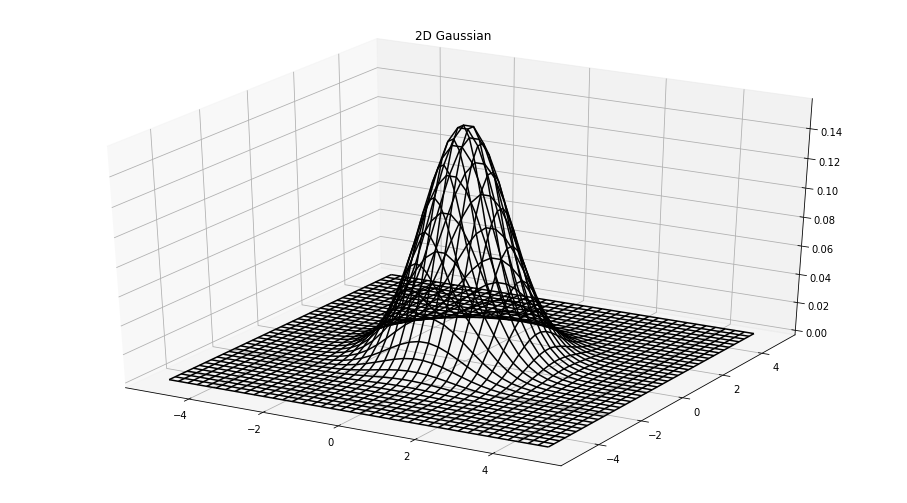

In [4]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='black')
ax.set_title('2D Gaussian')
plt.show()

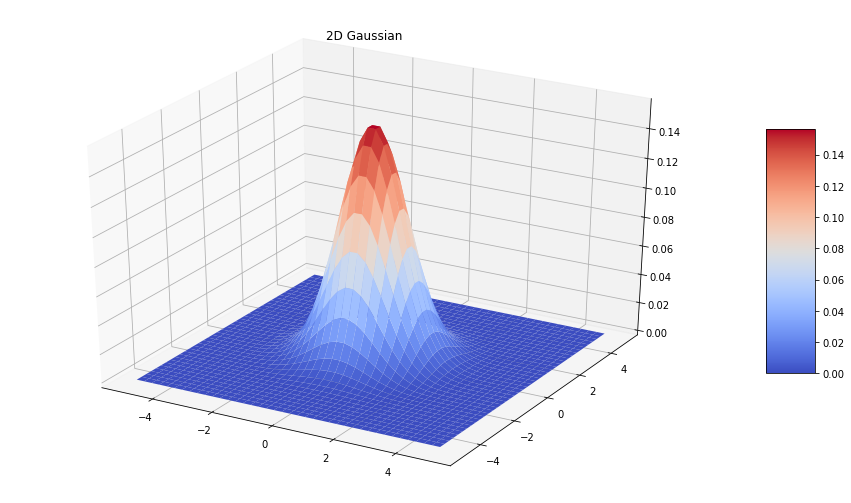

In [5]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_title('2D Gaussian')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

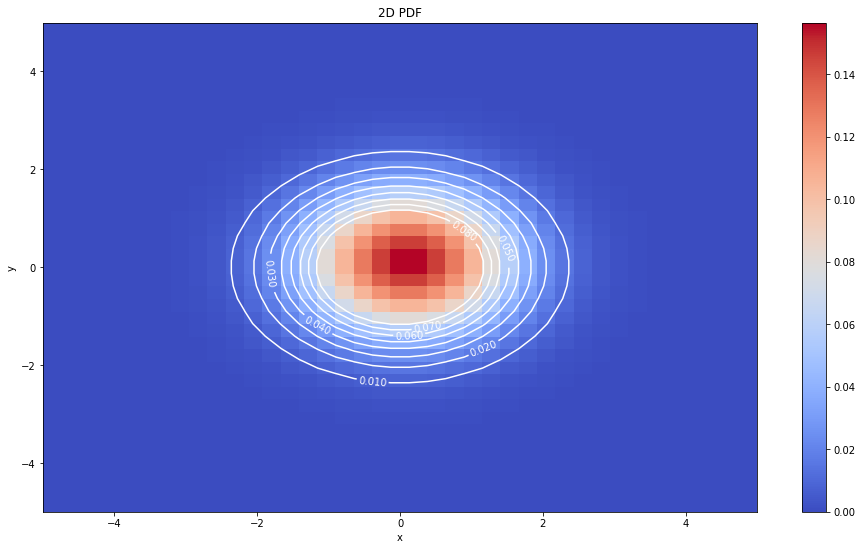

In [9]:
figure, ax = plt.subplots(figsize=(16,9))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max())
con = ax.contour(x, y, z, np.arange(0, 0.09, 0.01), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D PDF')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

Sarà pià difficile graficare una PDF a tre dimensioni:

$\displaystyle f(x,y,z) = \frac{\mathrm{d}P(x,y,z)}{\mathrm{d}x\,\mathrm{d}y\,\mathrm{d}z}$

ma concettualmente questa PDF non è più difficile di una PDF a due dimensioni.

# Distribuzioni marginali

Le distribuzioni di probabilità per le variabili $x$ e $y$ si ottengono integrando sull'altra (sulle altre, per più di due variabili) variabile:

$\displaystyle f_x(x) = \int f(x,y)\,\mathrm{d}y$

$\displaystyle f_y(y) = \int f(x,y)\,\mathrm{d}x$

$f_x$ e $f_y$ rappresentano le distribuzioni di probabilità di ciascuna variabile separatamente.

Si ottengono come caso particolare del cambio di coordinate: $\varphi_x: (x,y)\mapsto u = x$ e $\varphi_y: (x,y)\mapsto v = y$. Infatti:

$\displaystyle f_x(u) = \int \delta(x - u)\, f(x,y)\,\mathrm{d}x\,\mathrm{d}y = \int f(u,y)\,\mathrm{d}y$

Che è la definizione di cui sopra, sostituendo $u$ con $x$.

In sostanza, la distribuzione di probabilità di una sola variabile si ottiene *proiettando* la PDF su quella variabile.

# Distribuzione condizionale

Fissato un valore $x=x_0$, la PDF di $y$ si può calcolare normalizzando la PDF che viene calcolata per il valore di $x_0$ fissato:

$f(y|x_0) = \frac{\displaystyle f(x_0,y)}{\displaystyle\int f(x_0,y)\,\mathrm{d}y}$

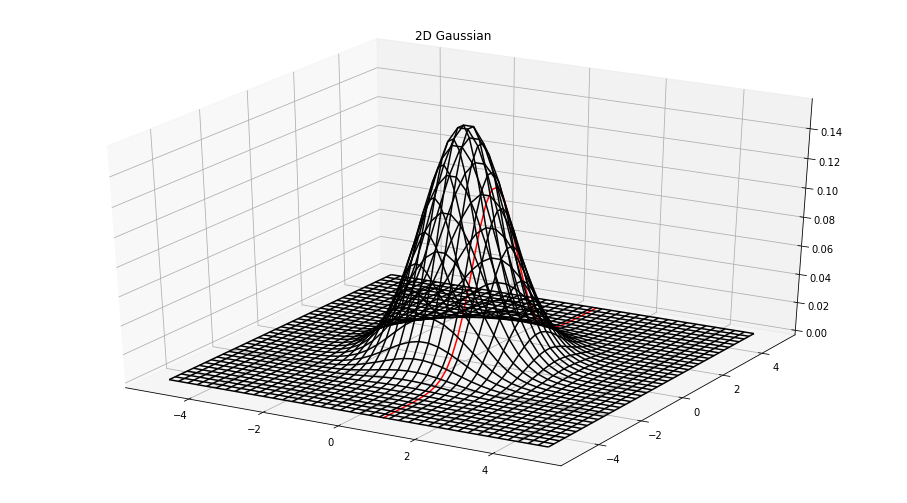

In [6]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='black')
ax.plot([0.75]*40, y_p, f(0.75, y_p), color='red')
ax.set_title('2D Gaussian')
plt.show()

Analogamente, fissato un valore $y=y_0$, la PDF di $x$ si può calcolare normalizzando la PDF che viene calcolata per il valore di $y_0$ fissato:

$f(x|y_0) = \frac{\displaystyle f(x,y_0)}{\displaystyle\int f(x,y_0)\,\mathrm{d}x}$

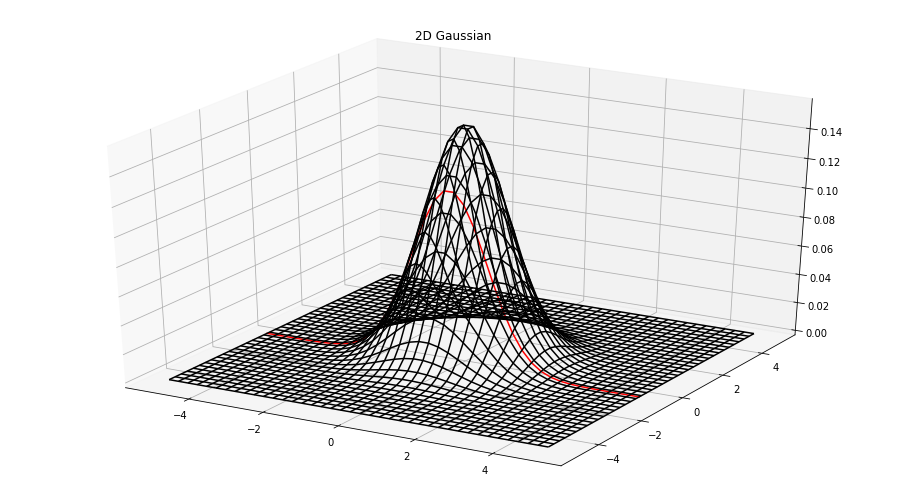

In [7]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='black')
ax.plot(x_p, [-0.75]*40, f(x_p, -0.75), color='red')
ax.set_title('2D Gaussian')
plt.show()

# Eventi e variabili indipendenti. Fattorizzazione della probabilità

Un evento $A$ è indipendente dall'evento $B$ se:

$P(A|B) = P(A)$

Ricordando la definizione di probabilità condiionata:

$\displaystyle P(A|B) = \frac{P(A\cap B)}{P(B)} = P(A)$

Quindi:

$P(A\cap B) = P(A)P(B)$

Vista la simmetria di questa condizione, se $A$ è indipendente da $B$, $B$ è indipendente da $A$. Si parla quindi di eventi $A$ e $B$ indipendenti.

## Variabili continue

Consideriamo evento $A$ e $B$ corrispondenti a intervalli infinitesimi in due variabili continue $x$ e $y$:

$A = \{\tilde x: x \le \tilde{x} < x+\delta x\}$

$B = \{\tilde y: y \le \tilde{y} < y+\delta y\}$

A questi eventi corrispondono le seguenti probabilità:

$P(A) = \delta P(x) = f_x(x)\,\delta x$

$P(B) = \delta P(y) = f_x(y)\,\delta y$

L'intersezione di $A$ e $B$ ha probabilità:

$\displaystyle P(A\cap B) = P(x \le \tilde{x} < x+\delta x\,\, and\,\, y \le \tilde{y} < y+\delta y) = \delta P(x,y) = f(x,y)\,\delta x\,\delta y.$

<img style="width: 400px;" src="img/pdf2d.png">

L'indipendenza di $A$ e $B$ diventa quindi:

$P(A)P(B) = \delta P(x, y) = f_x(x) f_y(y)\,\delta x\,\delta y$

Quindi possiamo scrivere:

$f(x,y) = f_x(x) f_y(y)$

In questo caso diciamo che $x$ e $y$ sono **variabili indipendenti**. Questo è vero se e solo se la PDF si fattorizza nel prodotto di due PDF delle due variabili $x$ e $y$.


# Correlazione

Nel caso di distribuzioni a più variabili, abbiamo già definito nel caso discreto la **covarianza** di due variabili come:

$\mathbb{C}\mathrm{ov}(x, y) = \mathbb{E}[x y] - \mathbb{E}[x] \mathbb{E}[y]$

Il coefficiente di correlazione invece è:

$\displaystyle \rho_{xy} = \frac{\mathbb{C}\mathrm{ov}(x, y)}{\sigma_x}{\sigma_y}$

e risulta $0\le \rho_{xy} \le 1$.

Si dimostra anche che:

$\mathbb{V}\mathrm{ar}[x+y] = \mathbb{V}\mathrm{ar}[x] + \mathbb{V}\mathrm{ar}[y] + 2\,\mathbb{C}\mathrm{ov}(x, y)$

<span style="color:blue">Due variabbili indipendenti hanno correlazione zero, ma se la correlazione è zero questo **non** implica che due variabili siano indipendenti!</span>